# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
data = pd.read_csv('data/states_edu.csv')
print(data.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [4]:
# Assuming 'Year' is the name of the column containing the year information

years = data['YEAR'].nunique()

print(f"There are {years} years of data logged in the dataset.")

There are 33 years of data logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [7]:
michigan_math8 = data[(data['STATE'] == 'MICHIGAN')]['AVG_MATH_8_SCORE']
ohio_math8 = data[(data['STATE'] == 'OHIO')]['AVG_MATH_8_SCORE']

michigan_mean = michigan_math8.mean()
ohio_mean = ohio_math8.mean()

if michigan_mean > ohio_mean:
    print("Michigan has a higher average score than Ohio.")
elif michigan_mean < ohio_mean:
    print("Ohio has a higher average score than Michigan.")
else:
    print("Michigan and Ohio have the same average score.")

Ohio has a higher average score than Michigan.


Find the average for your chosen test across all states in 2019

In [15]:
math8_2019_state = data[data['YEAR'] == 2019]['AVG_MATH_8_SCORE']
                                                 
math8_2019_mean = math8_2019_state.mean()

print(f"The average grade 8 math score across all states in 2019 was: {math8_2019_mean}")

The average grade 8 math score across all states in 2019 was: 281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [24]:
math8_max = data.groupby('STATE')['AVG_MATH_8_SCORE'].max()

print(math8_max)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [25]:
data = data.dropna(subset=['ENROLL', 'STATE_REVENUE', 'AVG_MATH_8_SCORE'])

data['State_Revenue_per_Student'] = data['STATE_REVENUE'] / data['ENROLL']

print(data[['STATE', 'YEAR', 'State_Revenue_per_Student', 'AVG_MATH_8_SCORE']])

              STATE  YEAR  State_Revenue_per_Student  AVG_MATH_8_SCORE
408         ALABAMA  2000                   4.113777             264.0
410         ARIZONA  2000                   3.045002             269.0
411        ARKANSAS  2000                   4.716793             257.0
412      CALIFORNIA  2000                   4.523420             260.0
414     CONNECTICUT  2000                   4.334637             281.0
...             ...   ...                        ...               ...
1219       VIRGINIA  2015                   4.875779             288.0
1220     WASHINGTON  2015                   7.734175             287.0
1221  WEST_VIRGINIA  2015                   7.080522             271.0
1222      WISCONSIN  2015                   6.810370             289.0
1223        WYOMING  2015                  11.898931             287.0

[397 rows x 4 columns]


Feature engineering justification: I believe that the amount of revenue reflects the quality of education given, therefore creating a higher test scores as more money are given towards school infrastructure, instructor quality etc

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

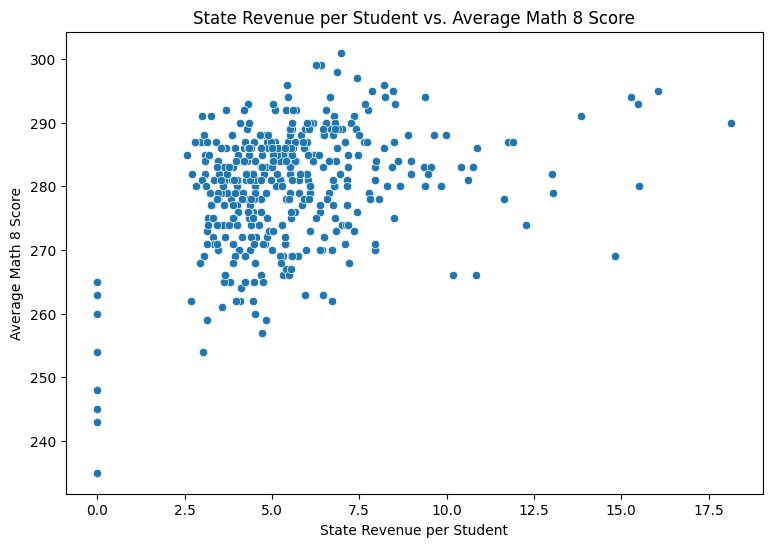

In [41]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=data, x='State_Revenue_per_Student', y='AVG_MATH_8_SCORE')
plt.title('State Revenue per Student vs. Average Math 8 Score')
plt.xlabel('State Revenue per Student')
plt.ylabel('Average Math 8 Score')
plt.show()

After looking at the scatterplot, i dont think there's much difference between the lower state revenue and the higher ones so maybe it depends fully on each individual rather than the whole revenue of a state. even thought the lowest standards indeed goes up along as the state revenue per student increase.

**Visualization 2**

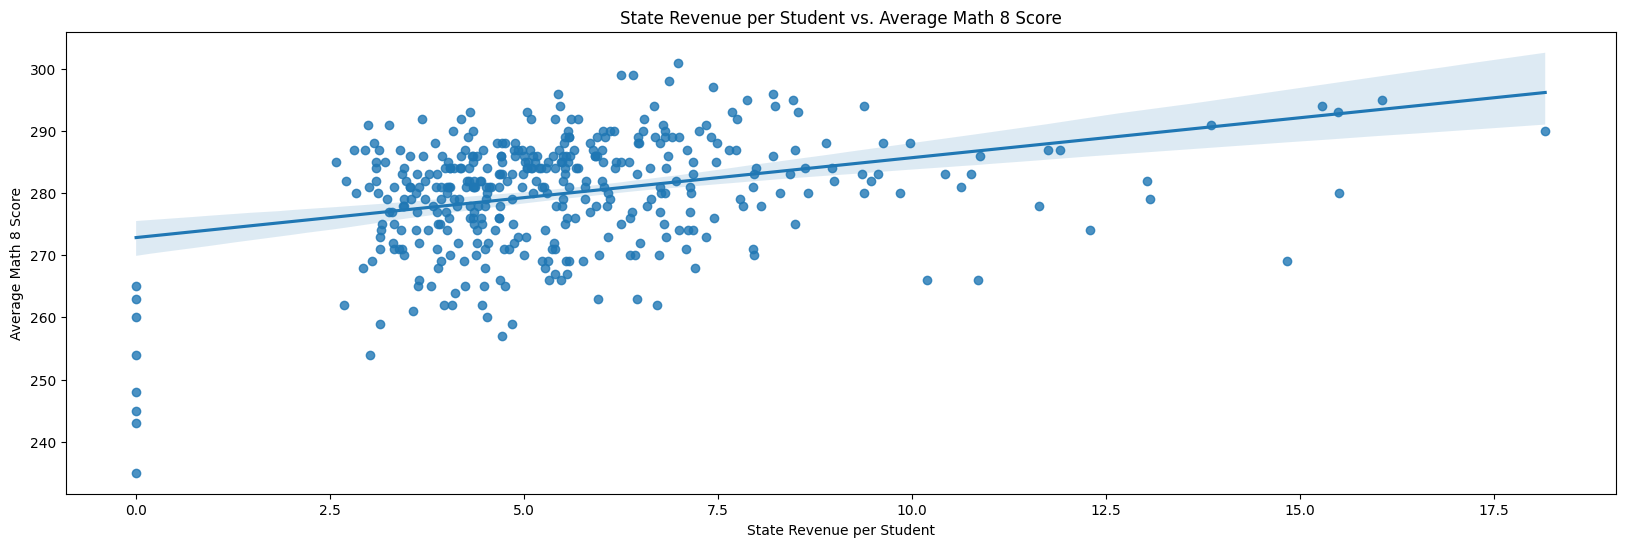

In [47]:
plt.figure(figsize=(20,6))
sns.regplot(data=data, x='State_Revenue_per_Student', y='AVG_MATH_8_SCORE')
plt.title('State Revenue per Student vs. Average Math 8 Score')
plt.xlabel('State Revenue per Student')
plt.ylabel('Average Math 8 Score')
plt.show()

This shows that even though the scatterplot didn't really help us visualize how the state revenue connects with a=te average grade, the linear regression line displays the overall trend, and the higher the state revenue per student is, the higher the average student's grade are which support my initial hypothesis. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = data[['State_Revenue_per_Student', 'YEAR']]
y = data['AVG_MATH_8_SCORE']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.20986157563059404

In [63]:
print(model.intercept_)
print(model.coef_)

-792.5649919223422
[0.96831617 0.53133077]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

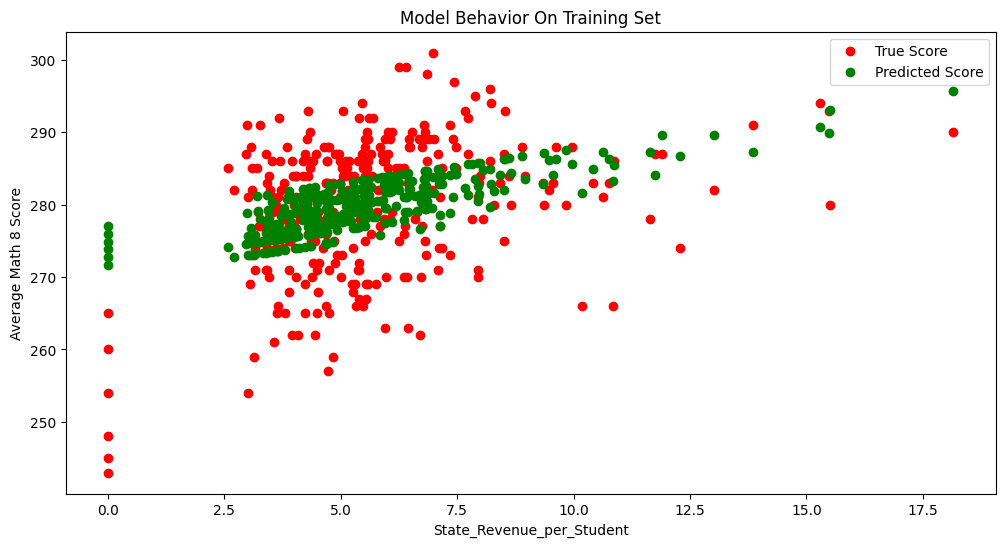

In [69]:
col_name = 'State_Revenue_per_Student'

plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red", label='True Score')

y_pred_train = model.predict(X_train)
regression_line_train = model.intercept_ + model.coef_[0] * X_train['State_Revenue_per_Student'] + model.coef_[1] * X_train['YEAR']
plt.scatter(X_train[col_name], regression_line_train, color="green", label='Predicted Score')

plt.legend()
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior On Training Set")
plt.show()

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

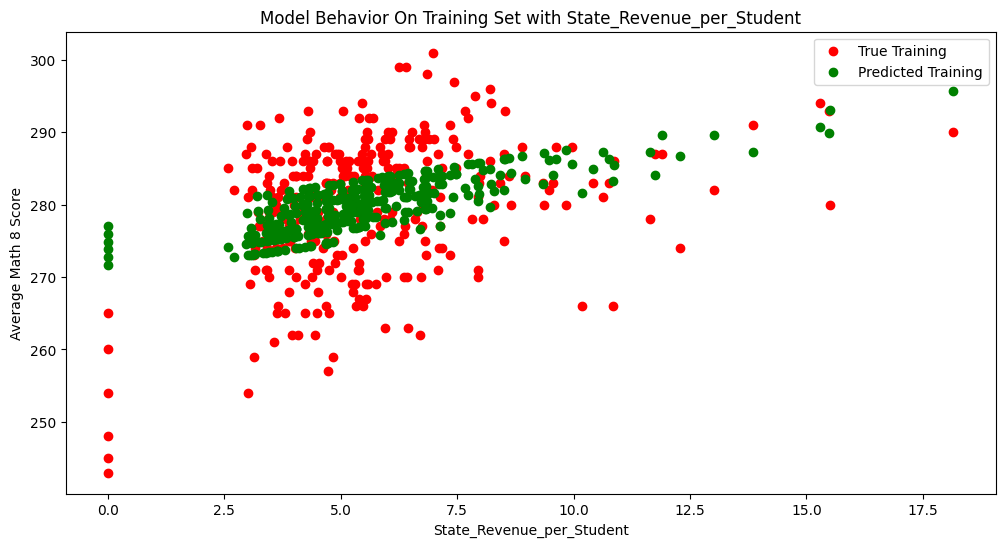

In [72]:
col_name = 'State_Revenue_per_Student'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title(f"Model Behavior On Training Set with {col_name}")

plt.show()

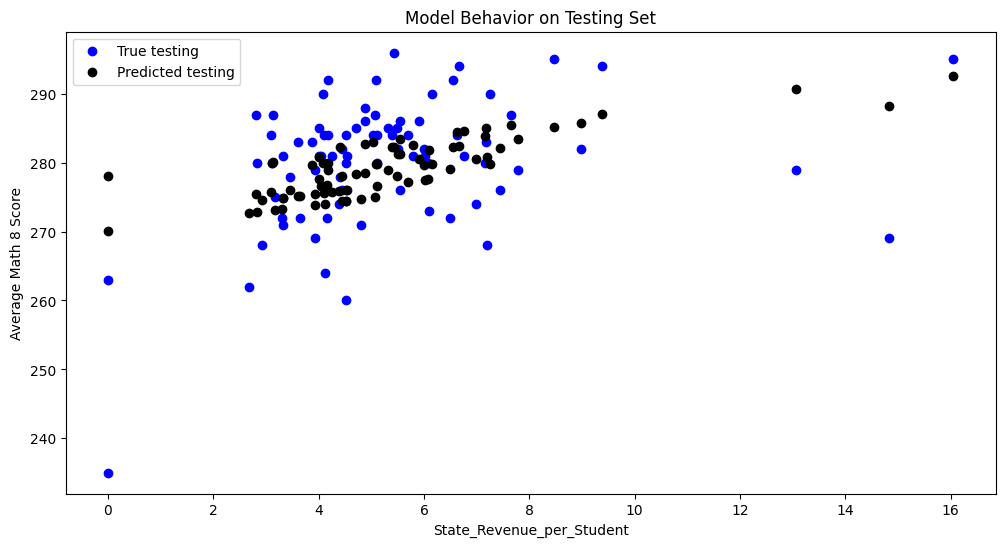

In [75]:
col_name = 'State_Revenue_per_Student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")

plt.show()

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I created graphs to display correlation on Average Math 8 Score and State_Revenue_per_Student, the graphs itself i think can show the correlation pretty well especially with the regression line feature that helps highlights the data. I think that the work can be improved more, and i think using only the regression line for this particular data would be kind of hard, because it'll just plot the dots at the overall trend line, when some of the data are very scattered and far. 